---

## [미니프로젝트] 서울시 공유자전거 '따릉이'의 수요 예측

### 여러분은 서울시 정책 연구원으로써 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

### ▣ 우리가 풀어야 하는 문제는 무엇인가요?

 - 기상상황이 따릉이 수요에 주는 영향을 분석해봅시다.

---

## ▣ 데이터 소개
[기본 데이터]
* 학습데이터 : traindata.csv

## ▣ 데이터셋의 변수 소개
* date : 날짜
* hour : 시간
* temperature : 온도
* precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
* windspeed : 풍속(평균)
* humidity : 습도
* visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone : 오존 수치
* PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count : 시간에 따른 따릉이 대여 수

---

### [과제1] 환경 설정
#### <span style="color: green"> 1) 라이브러리 불러오기 </span>

In [1]:
#EDA에 사용할 라이브러리를 import 하세요
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst

#### <span style="color: green"> 2) 활용할 데이터 불러오기 </span>

In [2]:
#이번 프로젝트에서 분석할 데이터를 불러오세요
data = pd.read_csv('traindata.csv')

In [117]:
data['ozone'].describe()

count    5669.000000
mean        0.031798
std         0.018247
min         0.001000
25%         0.019000
50%         0.031000
75%         0.041000
max         0.137000
Name: ozone, dtype: float64

In [113]:
data['before1_precipitation'] = data['precipitation'].shift(1)
data.dropna(axis=0,inplace=True)
data.head(10)

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,before1_precipitation
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40,0.0
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31,0.0
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12,0.0
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30,0.0
5,2021-04-01,6,31.0,14.0,0.009,12.6,0,3.0,45,2000,77,0.0
6,2021-04-01,7,30.0,10.0,0.018,12.0,0,3.5,46,2000,171,0.0
7,2021-04-01,8,39.0,10.0,0.027,14.0,0,3.5,43,2000,330,0.0
8,2021-04-01,9,35.0,10.0,0.032,16.2,0,4.3,38,2000,218,0.0
9,2021-04-01,10,31.0,9.0,0.033,18.2,0,3.7,31,2000,175,0.0
10,2021-04-01,11,34.0,9.0,0.038,20.2,0,2.9,25,2000,247,0.0


0.0    5243
1.0     426
Name: before1_precipitation, dtype: int64
count    5243.000000
mean      229.084494
std       186.652363
min         2.000000
25%        69.000000
50%       200.000000
75%       331.000000
max      1746.000000
Name: count, dtype: float64
count    426.000000
mean      53.629108
std       89.451366
min        1.000000
25%        6.000000
50%       17.000000
75%       66.750000
max      777.000000
Name: count, dtype: float64


Ttest_indResult(statistic=19.22190979771583, pvalue=8.050616689498141e-80)

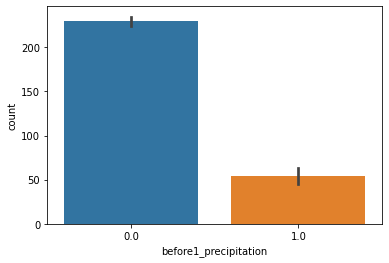

In [116]:
target = 'count'
feature = 'before1_precipitation'
temp = data[feature].value_counts()
print(temp)
s0 = data.loc[data[feature] == 0, 'count']
s1 = data.loc[data[feature] == 1, 'count']
print(s0.describe())
print(s1.describe())
sns.barplot(x=feature, y =target, data=data)
spst.ttest_ind(s0, s1)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5827 non-null   object 
 1   hour           5827 non-null   int64  
 2   PM10           5725 non-null   float64
 3   PM2.5          5732 non-null   float64
 4   ozone          5699 non-null   float64
 5   temperature    5827 non-null   float64
 6   precipitation  5827 non-null   int64  
 7   windspeed      5827 non-null   float64
 8   humidity       5827 non-null   int64  
 9   visibility     5827 non-null   int64  
 10  count          5827 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 500.9+ KB


In [4]:
data.isna().sum()

date               0
hour               0
PM10             102
PM2.5             95
ozone            128
temperature        0
precipitation      0
windspeed          0
humidity           0
visibility         0
count              0
dtype: int64

In [5]:
data_nonan = data.interpolate()

In [6]:
data_nonan.isna().sum()

date             0
hour             0
PM10             0
PM2.5            0
ozone            0
temperature      0
precipitation    0
windspeed        0
humidity         0
visibility       0
count            0
dtype: int64

### [과제2] 가설설정
#### '가설' 이란 단어를 생각해보면, 우리가 직접 가설을 만들어야 할것 같지만 통계에서 분석기법별 귀무가설/대립가설은 정해져있습니다.
- 귀무가설은 차이가 없다, 연관성이 없다, 효과가 없다.
- 대립가설은 차이가 있다, 연관성이 있다, 효과가 있다. 라고 간단하게 이해하시면 좋습니다.

#### 간단한 예로, 온도와 따릉이 대여량간 가설을 수립 해본다면

    - 귀무가설 : 온도와 따릉이 간에는 연관성이 없다.
    - 대립가설 : 온도와 따릉이 간에는 연관성이 있다.

로 가설이 자연스레 수립 됩니다.



---


#### <span style="color: green"> 'precipitation' 변수를 포함하여, 최소 5개 이상의 Feature와 따릉이 대여량 간 가설을 수립해주세요. </span>

##### Guide : Target은 따릉이 대여량 입니다.

- 가설 1 : 1시간전 강우 여부와 따릉이간에는 연관성이 없다.
> 대립가설 : 1시간전 강우 여부와 따릉이 대여량 간에는 연관성이 있다.
    
- 가설 2 : 습도와 따릉이 대여 수는 서로 연관이 있다.
> 대립가설 : 습도와 따릉이 대여 수는 서로 관련이 없다.

- 가설 3 :

- 가설 4 :

- 가설 5 :

- 가설 6 :

### [과제3] 단변량 분석

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

### Feature1 : hour

1. 변수가 내포하고 있는 의미
> 대여 시간

2. 변수가 수치형인지 범주형인지
> 수치형

3. 변수의 결측치 존재 여부 및 조치방안
> 결측치 존재하지 않음

4. 변수의 기초 통계량 확인

In [7]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [8]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.

In [9]:
data['hour'].value_counts()

1     243
14    243
23    243
22    243
21    243
20    243
19    243
18    243
17    243
16    243
15    243
13    243
12    243
11    243
10    243
9     243
8     243
7     243
5     243
0     243
2     242
6     242
3     242
4     241
Name: hour, dtype: int64

6. 위 정보로 부터 파악한 내용 정리

In [10]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [11]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature2 : temperature

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.
> 온도, Celcius 단위를 활용.

2. 변수가 수치형인지 범주형인지


In [12]:
data['temperature'].dtypes

dtype('float64')

In [13]:
data['temperature'].value_counts()

 21.1    50
 24.1    50
 22.0    45
 20.9    44
 18.8    43
         ..
 34.1     1
 36.1     1
 36.0     1
 35.6     1
-0.8      1
Name: temperature, Length: 377, dtype: int64

> 숫자형임을 알 수 있다.

3. 변수의 결측치 존재 여부 및 조치방안

In [14]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [15]:
data['temperature'].isna().sum()

0

> 결측치 없음

4. 변수의 기초 통계량 확인

In [16]:
#변수의 기초 통계량을 확인해보세요

In [17]:
data['temperature'].describe()

count    5827.000000
mean       19.376798
std         7.501572
min        -3.500000
25%        14.100000
50%        20.400000
75%        24.900000
max        36.300000
Name: temperature, dtype: float64

5. 변수의 분포 확인

In [18]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.

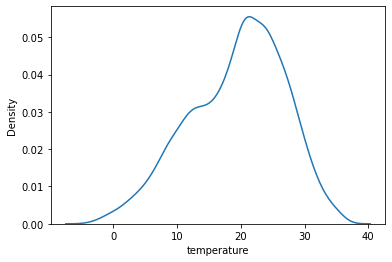

In [19]:
sns.kdeplot(data['temperature'])
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [20]:
#위 정보로부터 파악하신 내용을 정리해보세요.

평균 온도는 20도 내외인듯 하고
15~28도 정도 사이에 대부분의 자료가 분포되어있음.

7. 추가 분석사항 도출

In [21]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature3 : precipitation

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [22]:
#변수의 자료형을 확인해보세요.

In [23]:
data['precipitation'].dtypes

dtype('int64')

In [24]:
data['precipitation'].value_counts()

0    5387
1     440
Name: precipitation, dtype: int64

> 범주형

3. 변수의 결측치 존재 여부 및 조치방안

In [25]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [26]:
data['precipitation'].isna().sum()

0

> 결측치 없음

4. 변수의 기초 통계량 확인

In [27]:
#변수의 기초 통계량을 확인해보세요

In [28]:
data['precipitation'].describe()

count    5827.000000
mean        0.075511
std         0.264236
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: precipitation, dtype: float64

5. 변수의 분포 확인

In [29]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.

0    5387
1     440
Name: precipitation, dtype: int64


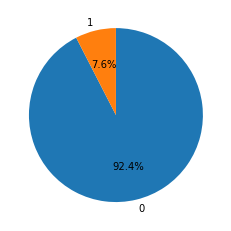

In [30]:
temp = data['precipitation'].value_counts()
print(temp)
plt.pie(temp.values, labels = temp.index, autopct = '%.1f%%',
       startangle=90, counterclock=False)
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [31]:
#위 정보로부터 파악하신 내용을 정리해보세요.

데이터 5827개 중 비가 오지 않은 데이터는 전체의 92.4%(5387개)를 차지한다.

7. 추가 분석사항 도출

In [32]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature4 : windspeed

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [33]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [34]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [35]:
data['windspeed'].isna().sum()

0

4. 변수의 기초 통계량 확인

In [36]:
#변수의 기초 통계량을 확인해보세요

In [37]:
data['windspeed'].describe()

count    5827.000000
mean        2.237601
std         1.054516
min         0.000000
25%         1.500000
50%         2.200000
75%         2.800000
max         8.300000
Name: windspeed, dtype: float64

5. 변수의 분포 확인

In [38]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.

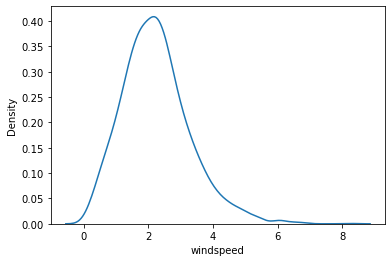

In [39]:
sns.kdeplot(data['windspeed'])
plt.show()

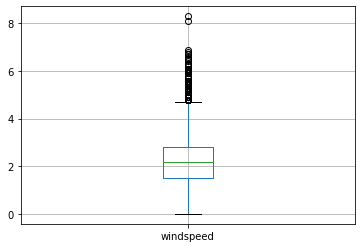

In [40]:
data.boxplot('windspeed')
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [41]:
#위 정보로부터 파악하신 내용을 정리해보세요.

데이터의 50%는 2.2m/s 이하의 풍속을 갖고 있으며, 

7. 추가 분석사항 도출

In [42]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature5 : humidity

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [43]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [44]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [110]:
#변수의 기초 통계량을 확인해보세요
data['humidity'].describe()

count    5827.000000
mean       68.608718
std        17.277266
min        19.000000
25%        56.000000
50%        70.000000
75%        82.000000
max       100.000000
Name: humidity, dtype: float64

5. 변수의 분포 확인

In [46]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.

6. 위 정보로 부터 파악한 내용 정리

In [47]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [48]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature6 : visibility

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [49]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [50]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [51]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [52]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.

6. 위 정보로 부터 파악한 내용 정리

In [53]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [54]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature7 : ozone

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [55]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [56]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [57]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [58]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.

6. 위 정보로 부터 파악한 내용 정리

In [59]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [60]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature8 : PM10

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [61]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [62]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [63]:
data['PM10'].isna().sum()

102

> 결측치가 있으므로 조치방안을 생각해보았습니다.

In [64]:
#pd.set_option('display.max_rows', None)
#data.loc[data['PM10'].isnull()].head(102) # 2021-10-07, 2021-10-08이 거의 대부분 nan

> 데이터를 모두 삭제하는 등의 조치는 위험하다고 판단하여 결측치가 있는 데이터를 찾아보았다.

In [65]:
data2 = data.copy()
de1 = data[data['date'] == '2021-10-07'].index
de2 = data[data['date'] == '2021-10-08'].index
data2.drop(de1, axis=0, inplace=True)
data2.drop(de2, axis=0, inplace=True)
data2 = data2.interpolate()
data2.isna().sum()

date             0
hour             0
PM10             0
PM2.5            0
ozone            0
temperature      0
precipitation    0
windspeed        0
humidity         0
visibility       0
count            0
dtype: int64

> 하루의 절반 이상이 결측치인 경우는 삭제. 그렇지 않은 경우는 interpolate를 적용하였다.

4. 변수의 기초 통계량 확인

In [66]:
#변수의 기초 통계량을 확인해보세요

In [67]:
data2['PM10'].describe()

count    5779.000000
mean       31.966430
std        42.800882
min         3.000000
25%        16.000000
50%        25.000000
75%        37.000000
max       827.000000
Name: PM10, dtype: float64

5. 변수의 분포 확인

In [68]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.

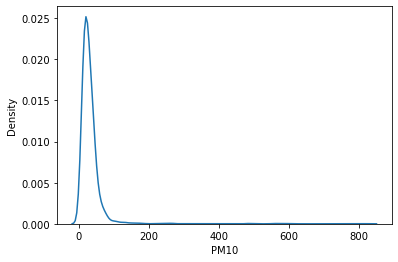

In [69]:
sns.kdeplot(data_nonan['PM10'])
plt.show()

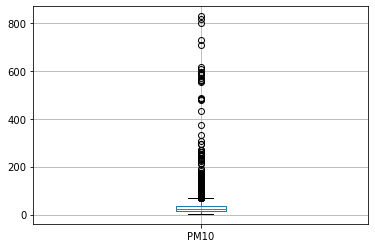

In [70]:
data_nonan.boxplot('PM10')
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [71]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [72]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature9 : PM2.5

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [73]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [74]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [75]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [76]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.

6. 위 정보로 부터 파악한 내용 정리

In [77]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [78]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Count (Target)

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [79]:
#변수의 자료형을 확인해보세요.

In [80]:
data['count'].dtypes

dtype('int64')

In [81]:
data['count'].value_counts()

20     45
16     45
24     44
21     44
25     44
       ..
553     1
789     1
803     1
794     1
519     1
Name: count, Length: 757, dtype: int64

3. 변수의 결측치 존재 여부 및 조치방안

In [82]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [83]:
data['count'].isna().sum()

0

4. 변수의 기초 통계량 확인

In [84]:
#변수의 기초 통계량을 확인해보세요

In [85]:
data['count'].describe()

count    5827.000000
mean      215.117899
std       185.972900
min         1.000000
25%        53.000000
50%       186.000000
75%       315.000000
max      1746.000000
Name: count, dtype: float64

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5827 non-null   object 
 1   hour           5827 non-null   int64  
 2   PM10           5725 non-null   float64
 3   PM2.5          5732 non-null   float64
 4   ozone          5699 non-null   float64
 5   temperature    5827 non-null   float64
 6   precipitation  5827 non-null   int64  
 7   windspeed      5827 non-null   float64
 8   humidity       5827 non-null   int64  
 9   visibility     5827 non-null   int64  
 10  count          5827 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 500.9+ KB


In [87]:
data2 = data.loc[data['count'] > 315]
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1447 entries, 7 to 5821
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1447 non-null   object 
 1   hour           1447 non-null   int64  
 2   PM10           1429 non-null   float64
 3   PM2.5          1431 non-null   float64
 4   ozone          1435 non-null   float64
 5   temperature    1447 non-null   float64
 6   precipitation  1447 non-null   int64  
 7   windspeed      1447 non-null   float64
 8   humidity       1447 non-null   int64  
 9   visibility     1447 non-null   int64  
 10  count          1447 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 135.7+ KB


5. 변수의 분포 확인

In [88]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.

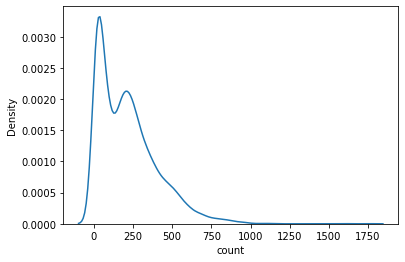

In [89]:
sns.kdeplot(data['count'])
plt.show()

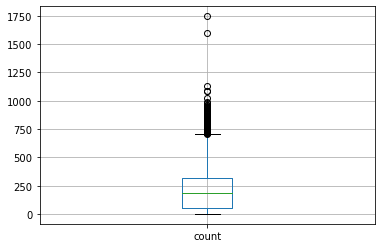

In [90]:
data.boxplot('count')
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [91]:
#위 정보로부터 파악하신 내용을 정리해보세요.

데이터의 50% 이상은 250개를 넘지 않는다.

7. 추가 분석사항 도출

In [92]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### 4.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [93]:
target = 'count'

#### (1) 범주형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.</font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : t-test, anova
        3. 관계 평가 (가설 검정)

1. 강수 여부와 따릉이 대여량간 이변량 분석

In [94]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

In [95]:
feature = 'precipitation'

In [96]:
s0 = data.loc[data['precipitation'] == 0, 'count']
s1 = data.loc[data['precipitation'] == 1, 'count']
display(s0.describe())
display(s1.describe())

count    5387.000000
mean      229.459625
std       185.212698
min         1.000000
25%        72.000000
50%       200.000000
75%       329.500000
max      1746.000000
Name: count, dtype: float64

count    440.000000
mean      39.529545
std       68.565211
min        1.000000
25%        6.000000
50%       14.000000
75%       39.250000
max      555.000000
Name: count, dtype: float64

Ttest_indResult(statistic=21.389614151911022, pvalue=8.86239184041254e-98)

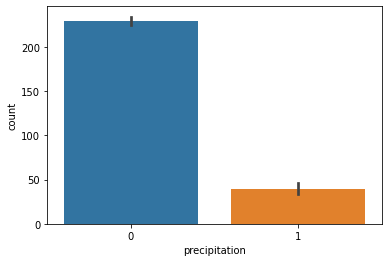

In [97]:
sns.barplot(x=feature, y =target, data=data)
spst.ttest_ind(s0, s1)

<Figure size 720x720 with 0 Axes>

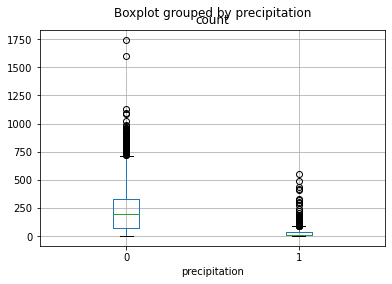

In [98]:
plt.figure(figsize=(10,10))
data.boxplot(target, feature)
plt.show()

#### (2) 숫자형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  </font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : 상관분석
        3. 관계 평가 (가설 검정)

2. 시간대별 데이터와 따릉이 대여량간 분석

In [99]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

3. 온도 데이터와 따릉이 대여량간 분석

In [100]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

4. 풍속 데이터와 따릉이 대여량간 분석

In [101]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

5. 습도 데이터와 따릉이 대여량간 분석

In [102]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

In [103]:
feature = 'humidity'

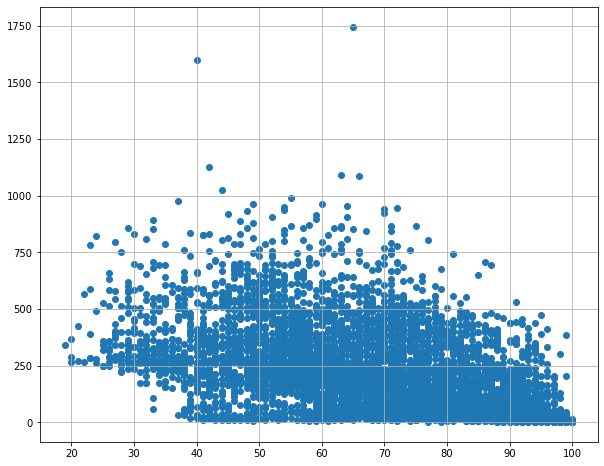

In [104]:
plt.figure(figsize=(10,8))
plt.scatter(data[feature],data[target])
plt.grid()
plt.show()

In [105]:
spst.pearsonr(data[feature], data[target])

(-0.4789554265904119, 0.0)

6. 시정 데이터와 따릉이 대여량간 분석

In [106]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

7. 오존 데이터와 따릉이 대여량간 분석

In [107]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

8. 미세먼지 농도 데이터와 따릉이 대여량간 분석

In [108]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

9. 초미세먼지 농도 데이터와 따릉이 대여량간 분석

In [109]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

### 5. 가설 검정

#### <font color='green'>1. 강한 관계의 변수 (대립가설 채택)</font>

#### <font color='green'>2. 약한 관계의 변수</font>


#### <font color='green'>3. 관계 없는 변수 (귀무가설 채택)</font>


### 6. Insight 도출